In [183]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
path = 'coffee_sales_data.csv'
data = pd.read_csv(path)
data.head()

,Дата,День недели,Количество Продаж,Тип Кофе,Цена за Чашку,Погодные Условия,Выходной
0,2024-01-01,Monday,197,Латте,131,Облачно,Нет
1,2024-01-02,Tuesday,58,Эспрессо,143,Облачно,Нет
2,2024-01-03,Wednesday,99,Эспрессо,192,Солнечно,Нет
3,2024-01-04,Thursday,196,Эспрессо,142,Дождь,Да
4,2024-01-05,Friday,132,Капучино,117,Солнечно,Да


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Дата               366 non-null    object
 1   День недели        366 non-null    object
 2   Количество Продаж  366 non-null    int64 
 3   Тип Кофе           366 non-null    object
 4   Цена за Чашку      366 non-null    int64 
 5   Погодные Условия   366 non-null    object
 6   Выходной           366 non-null    object
dtypes: int64(2), object(5)
memory usage: 20.1+ KB


In [99]:
data.isnull().sum()

Дата                 0
День недели          0
Количество Продаж    0
Тип Кофе             0
Цена за Чашку        0
Погодные Условия     0
Выходной             0
dtype: int64

In [102]:
data.shape

(366, 7)

In [104]:
data.describe()

,Количество Продаж,Цена за Чашку
count,366.000000,366.000000
mean,125.549180,152.054645
std,42.856134,29.196965
min,50.000000,100.000000
25%,89.000000,126.000000
50%,125.000000,153.500000
75%,163.000000,177.000000
max,200.000000,200.000000


## Задание 1: Анализ общего количества продаж по дням недели

Постройте столбчатую диаграмму, показывающую распределение общего количества продаж кофе по дням недели. Используйте дни недели на оси X и общее количество продаж на оси Y. Какие дни недели имеют наибольшие продажи?



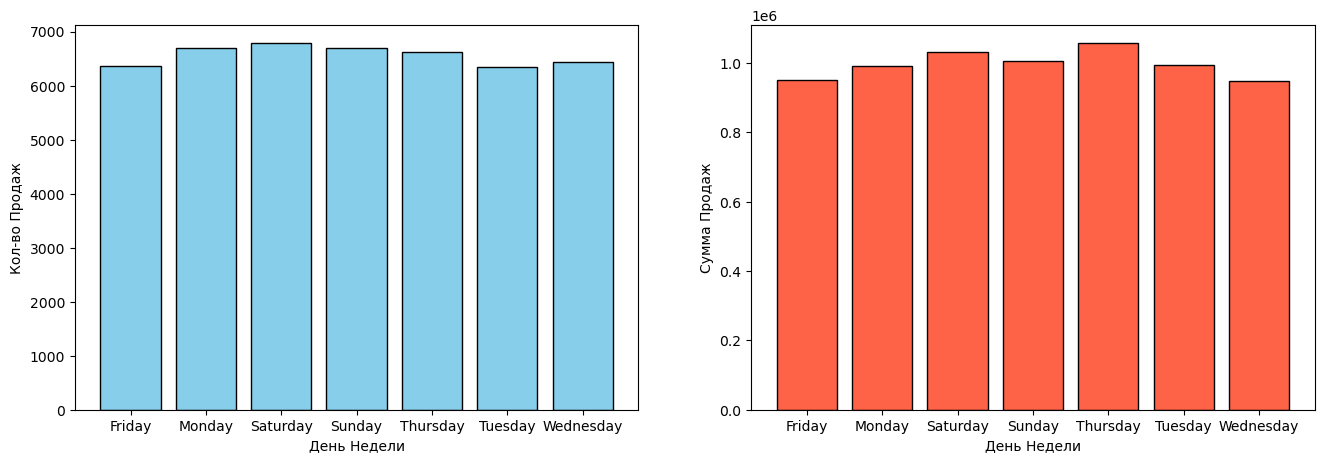

In [177]:
count_of_sales = data.groupby('День недели')['Количество Продаж'].sum().reset_index()
sum_of_sales = data.copy()
sum_of_sales['Общая сумма'] = sum_of_sales['Количество Продаж']*sum_of_sales['Цена за Чашку']
sum_of_sales = sum_of_sales.groupby('День недели')['Общая сумма'].sum().reset_index()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(count_of_sales['День недели'], count_of_sales['Количество Продаж'],color='skyblue',edgecolor='black')
plt.xlabel('День Недели', fontsize=10)
plt.ylabel('Кол-во Продаж', fontsize=10)

plt.subplot(1,2,2)
plt.bar(sum_of_sales['День недели'],sum_of_sales['Общая сумма'],color='tomato',edgecolor='black')
plt.xlabel('День Недели')
plt.ylabel('Сумма Продаж')

plt.show()

## Выводы от 1 Задания
  1. Самый продаваемый день недели -> Суббота
  2. Самый прибыльный день -> Четверг

## Задание 2: Анализ цен на разные типы кофе

Создайте boxplot, который покажет распределение цен на разные типы кофе (Эспрессо, Латте, Капучино). Используйте тип кофе на оси X и цены на оси Y. Какой тип кофе имеет наибольший разброс цен?

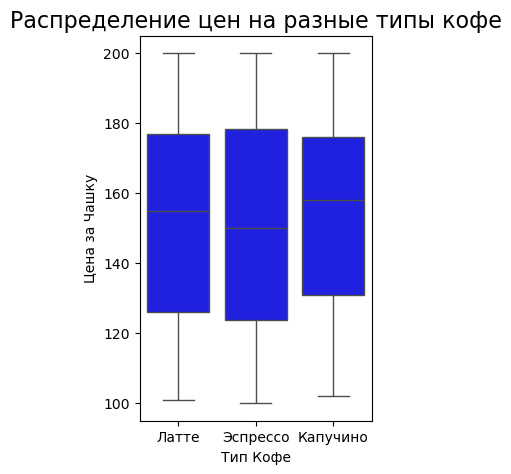

In [221]:
plt.figure(figsize=(3,5))
sns.boxplot(x='Тип Кофе',y='Цена за Чашку',data=data,color='blue')
plt.title('Распределение цен на разные типы кофе', fontsize=16)
plt.show()

## Выводы из 2 Задания
На основе твоего графика можно сказать, что Эспрессо имеет наибольший разброс цен среди всех трёх типов кофе, потому что у него наибольшая длина коробки и "усиков".

## Задание 3: Анализ взаимосвязи между выходными и продажами

Исследовать влияние выходных дней на продажи кофе в магазине с помощью столбчатой диаграммы, показывающей разницу в общем количестве продаж между выходными и будними днями. Определить, в какие дни наблюдается больше продаж

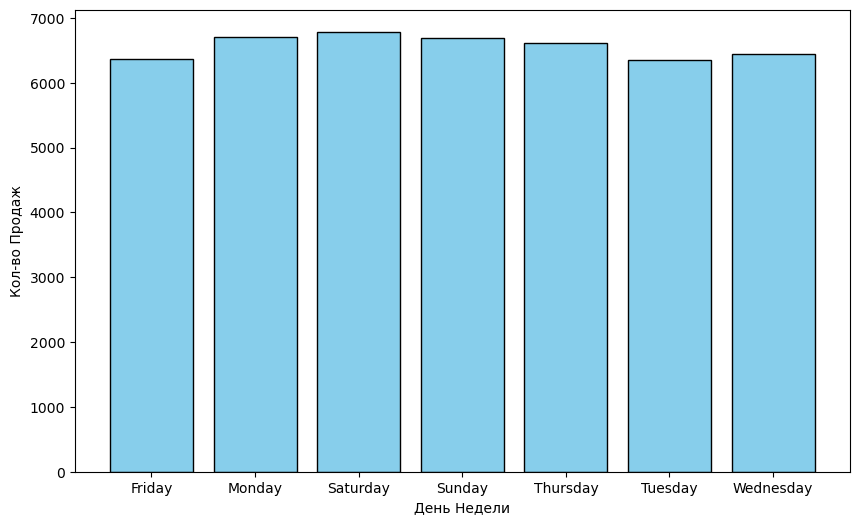

In [229]:
plt.figure(figsize=(10,6))
plt.bar(count_of_sales['День недели'], count_of_sales['Количество Продаж'],color='skyblue',edgecolor='black')
plt.xlabel('День Недели', fontsize=10)
plt.ylabel('Кол-во Продаж', fontsize=10)
plt.show()

## Выводы задание 3
Можно заметить то что максимальное количество продаж находиться в Saturday(Суббота) и небольшое отклонение в Воскресенье, и В Понеденльник тоже хорошие продажи но в будние рабочие дни продажи чуть снижаеться но только на немного.